In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
os.chdir("d:/Projet/quora-question-pairs")
os.getcwd()

'd:\\Projet\\quora-question-pairs'

In [4]:
import pandas as pd

# Lire seulement quelques lignes pour vérifier
xtrain = pd.read_csv("quora_data/train.csv")
xtest = pd.read_csv("quora_data/test.csv")
xtest2 = pd.read_csv("quora_data/test2.csv")
xsample_submission = pd.read_csv("quora_data/sample_submission.csv")
xtrain.shape, xtest.shape, xtest2.shape, xsample_submission.shape

((404290, 6), (2345796, 3), (2345796, 3), (2345796, 2))

In [5]:
xtrain

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [6]:
xtest

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [7]:
xtest2

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
...,...,...,...
2345791,2345791,How do Peaks (TV series): Why did Leland kill ...,What is the most study scene in twin peaks?
2345792,2345792,"What does be ""in transit"" mean on FedEx tracking?",How question FedEx packages delivered?
2345793,2345793,What are some famous Romanian drinks (alcoholi...,Can a non-alcoholic restaurant be a huge success?
2345794,2345794,What were the best and worst things about publ...,What are the best and worst things examination...


In [8]:
xsample_submission

,test_id,is_duplicate
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
2345791,2345791,1
2345792,2345792,1
2345793,2345793,1
2345794,2345794,1


In [9]:
xsample_submission["is_duplicate"].sum()

np.int64(2345796)

In [10]:
xtrain[["question1", "question2"]]

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?
...,...,...
404285,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...
404286,Do you believe there is life after death?,Is it true that there is life after death?
404287,What is one coin?,What's this coin?
404288,What is the approx annual cost of living while...,I am having little hairfall problem but I want...


In [12]:
from sklearn.model_selection import train_test_split

X = xtrain[['question1', 'question2']]
y = xtrain.is_duplicate
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
train = pd.concat([y_train, X_train], axis=1)
test = pd.concat([y_test, X_test], axis=1)

X_train.shape, X_test.shape

(404290, 2) (404290,)


((323432, 2), (80858, 2))

In [15]:
X_train.loc[X_train.question1.isna() | X_train.question2.isna(), :]

,question1,question2
363362,NaN,My Chinese name is Haichao Yu. What English na...
105780,How can I develop android app?,NaN


In [16]:
X_train.loc[X_train.question1.isna() | X_train.question2.isna(), ['question1',	'question2']]

,question1,question2
363362,NaN,My Chinese name is Haichao Yu. What English na...
105780,How can I develop android app?,NaN


In [23]:
from src.data_cleaning.missing_text_imputer2 import MissingTextImputer
X_train_cor = MissingTextImputer(n_repeat=0).fit_transform(X_train, y_train)

In [24]:
X_train_cor.loc[[363362, 105780]]

,question1,question2
363362,,My Chinese name is Haichao Yu. What English na...
105780,How can I develop android app?,


In [34]:
from src.features_extraction.text_similarity_features3 import TextSimilarityFeatures
X_train_features = TextSimilarityFeatures().fit_transform(X_train_cor)
X_train_features

,len_text1,len_text2,len_diff,num_words1,num_words2,num_words_diff,lexical_density1,lexical_density2,lexical_density_diff,common_words,common_words_ratio,cosine_sim
341317,19,32,13,4,6,2,0.210526,0.187500,2.302631e-02,2,0.250000,0.952152
237560,112,144,32,21,27,6,0.187500,0.187500,3.720238e-10,5,0.116279,0.234294
280719,39,44,5,9,11,2,0.230769,0.250000,1.923077e-02,7,0.538461,0.707293
288940,52,93,41,9,16,7,0.173077,0.172043,1.033911e-03,3,0.136364,0.041786
27093,47,41,6,8,7,1,0.170213,0.170732,5.189408e-04,3,0.250000,0.617632
...,...,...,...,...,...,...,...,...,...,...,...,...
83139,38,57,19,9,13,4,0.236842,0.228070,8.771928e-03,8,0.571429,0.669827
356995,47,51,4,9,9,0,0.191489,0.176471,1.501877e-02,7,0.636364,0.901084
311479,79,82,3,16,17,1,0.202532,0.207317,4.785428e-03,8,0.320000,0.374083
250945,52,82,30,8,14,6,0.153846,0.170732,1.688555e-02,4,0.222222,0.378868


In [35]:
X_train_features.loc[[363362, 105780]]

,len_text1,len_text2,len_diff,num_words1,num_words2,num_words_diff,lexical_density1,lexical_density2,lexical_density_diff,common_words,common_words_ratio,cosine_sim
363362,0,123,123,0,21,21,0.0,0.170732,0.170732,0,0.0,0.0
105780,30,0,30,6,0,6,0.2,0.000000,0.200000,0,0.0,0.0


In [31]:
y_train.mean()

np.float64(0.36919661629028666)

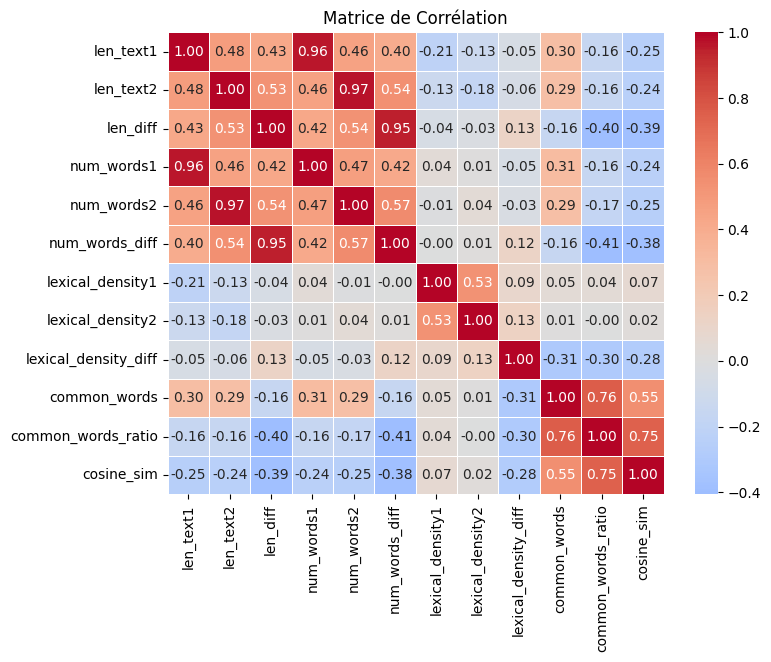

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = X_train_features.corr()

# Affichage avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, cbar=True)
plt.title("Matrice de Corrélation")
plt.show()